In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("haberman1.csv")

In [7]:
data

,Age,op_year,axil_node,surv_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [30]:
# #Total Classes in our dataset
data.columns

Index(['Age', 'op_year', 'axil_node', 'surv_stat'], dtype='object')

In [33]:
#How many data points are there (Total rows and columns)
data.shape

(306, 4)

In [34]:
# shows the total people survived from Breast cancer are denoted by 1 else 2
data["surv_stat"].value_counts()

1    225
2     81
Name: surv_stat, dtype: int64

In [13]:
#Getting mean,median,std  of our data set
data.describe()

,Age,op_year,axil_node,surv_stat
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


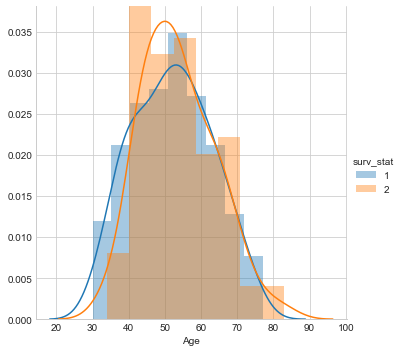

In [79]:
#          OBJECTIVE-
# ** To Predict whether the patient will survive or not depends upon the patient's age, 
##    year of treatment and the number of positive lymph nodes **

# Univariate analysis 
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(data,hue="surv_stat",size=5)\
   .map(sns.distplot,"Age")\
.add_legend();
plt.show();



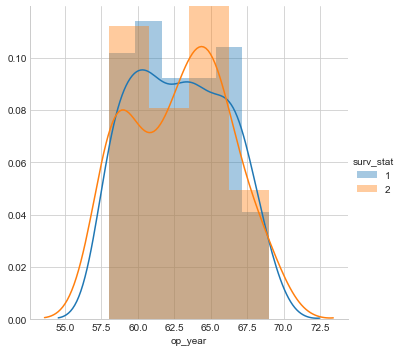

In [65]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(data,hue="surv_stat",size=5)\
   .map(sns.distplot,"op_year")\
   .add_legend();
plt.show();

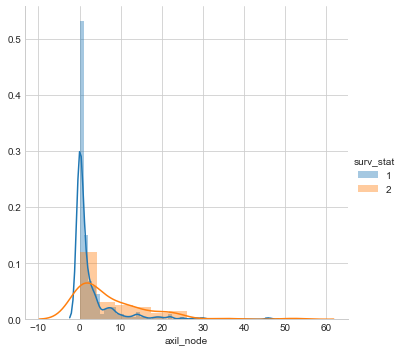

In [66]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(data,hue="surv_stat",size=5)\
   .map(sns.distplot,"axil_node")\
    .add_legend();
plt.show();

In [28]:
# 1)the above op_year and Age are overlapping with each other  compare to axil_node so axil_node 
# 2)axil_node is the best feature to predict Survivval rate
# 3)at age 55 there is the less number of people survived 
# 4)till axil node 5 large number of people survived

In [17]:
#PDF and CDF

Survived=data.loc[data['surv_stat']==1]
not_Survived=data.loc[data['surv_stat']==2]



[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


Text(0.5,1,'PDF and CDF for Age-Survived')

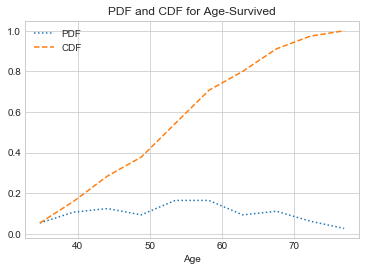

In [55]:
  #PDF and CDF for Age Survived
counts,bin_edges=np.histogram(Survived['Age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,ls='dotted',label='PDF')
plt.plot(bin_edges[1:],cdf,ls='--',label='CDF')
plt.xlabel("Age")
plt.legend();
plt.title('PDF and CDF for Age-Survived')

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


Text(0.5,1,'PDF and CDF for Age-Not Survived')

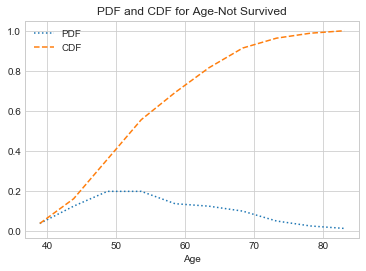

In [56]:
#PDF and CDF for Age Not survived
counts,bin_edges=np.histogram(not_Survived['Age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,ls='dotted',label='PDF')
plt.plot(bin_edges[1:],cdf,ls='--',label='CDF')
plt.xlabel("Age")
plt.legend();
plt.title('PDF and CDF for Age-Not Survived')

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5,1,'PDF and CDF for Axilnode-Survived')

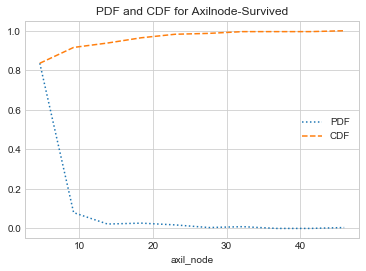

In [57]:
#PDF and CDF for Axil_node Survived

counts,bin_edges=np.histogram(Survived['axil_node'],bins=10,density=True)
pdf=counts/sum(counts);
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.xlabel("axil_node")
plt.plot(bin_edges[1:],pdf,ls='dotted',label='PDF')
plt.plot(bin_edges[1:],cdf,ls='--',label='CDF')
plt.legend();
plt.title('PDF and CDF for Axilnode-Survived')

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


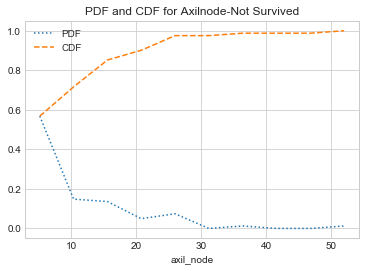

In [58]:
#PDF and CDF for Axil_node not_Survived
counts,bin_edges=np.histogram(not_Survived['axil_node'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf);
cdf=np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,ls='dotted',label='PDF')
plt.plot(bin_edges[1:],cdf,ls='--',label='CDF')
plt.xlabel("axil_node")
plt.legend();
plt.title('PDF and CDF for Axilnode-Not Survived')
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]


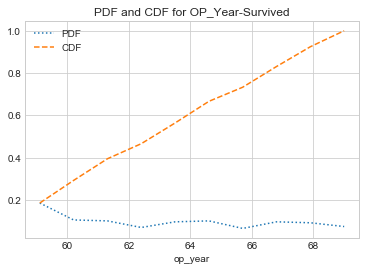

In [59]:
#PDF and CDF for OP_Year Survived
counts,bin_edges=np.histogram(Survived['op_year'],bins=10,density=True)
pdf=counts/sum(counts);
print(pdf);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,ls='dotted',label='PDF')
plt.plot(bin_edges[1:],cdf,ls='--',label='CDF')
plt.xlabel("op_year")
plt.legend();
plt.title('PDF and CDF for OP_Year-Survived')
plt.show()

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


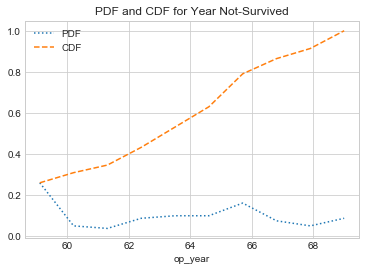

In [60]:
#PDF and CDF for OP_Year not survived
counts,bin_edges=np.histogram(not_Survived['op_year'],bins=10,density=True)
pdf=counts/sum(counts);
print(pdf);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,ls='dotted',label='PDF')
plt.plot(bin_edges[1:],cdf,ls='--',label='CDF')
plt.xlabel("op_year")
plt.legend();
plt.title('PDF and CDF for Year Not-Survived')
plt.show()

In [94]:
                    ##Observations From univariate analysis ##
#1)From above cdf Year of operation plays a least importance for classification
#2)if axillary nodes increases there is less probability of survival rate 
#3)About 80% of the patients have less than 5 nodes
#4)The patients treated between 1964-1966 have most probably high survival rate

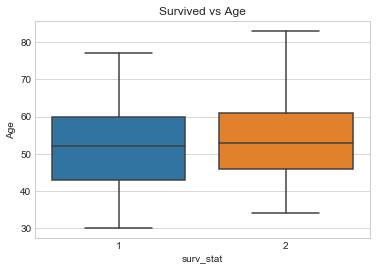

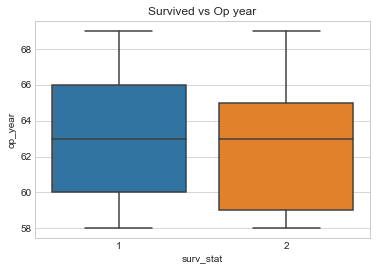

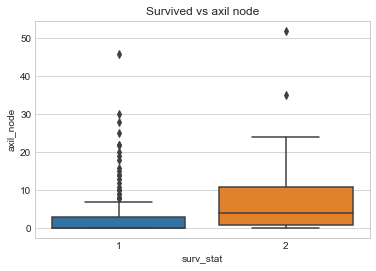

In [61]:
#Boxplot
sns.boxplot(x='surv_stat',y='Age',data=data)
plt.title("Survived vs Age")
plt.show()
sns.boxplot(x='surv_stat',y='op_year',data=data)
plt.title('Survived vs Op year')
plt.show()
sns.boxplot(x='surv_stat',y='axil_node',data=data)
plt.title("Survived vs axil node")
plt.show()


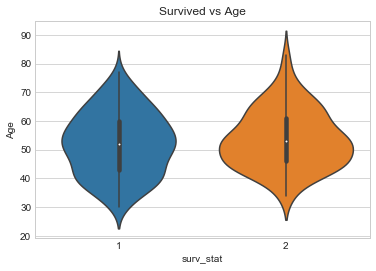

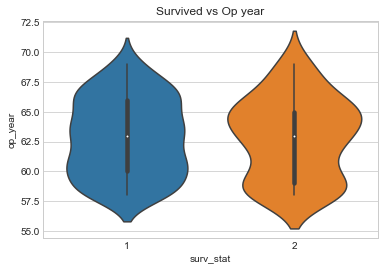

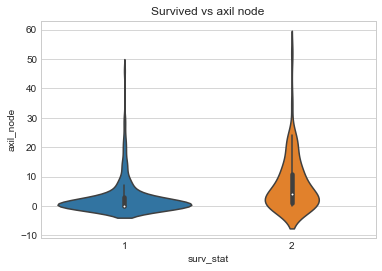

In [62]:
    ## observations from Boxplot##
## 1)75% of the patients have less than 5 axil nodes
  #2)The age of operation year of 75% of the patients are between 64-66

    #violinplot
sns.violinplot(x='surv_stat',y='Age',data=data)
plt.title("Survived vs Age")
plt.show()
sns.violinplot(x='surv_stat',y='op_year',data=data)
plt.title('Survived vs Op year')
plt.show()
sns.violinplot(x='surv_stat',y='axil_node',data=data)
plt.title("Survived vs axil node")
plt.show()



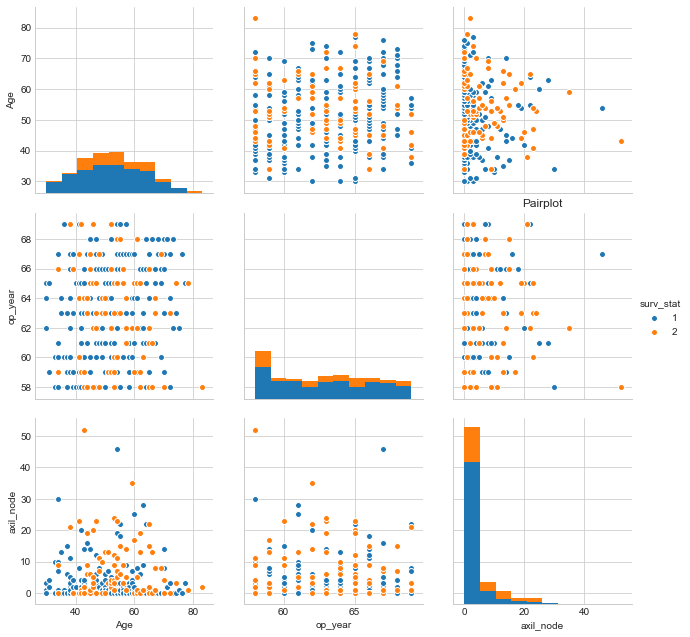

In [78]:
#Multivariate Analysis

sns.set_style("whitegrid")
sns.pairplot(data,
             x_vars=['Age','op_year','axil_node'],
             y_vars=['Age','op_year','axil_node'],
                     hue='surv_stat',size=3)
plt.title('Pairplot')
plt.show()


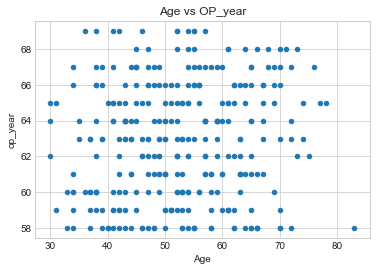

In [76]:
data.plot(kind='scatter',x='Age',y='op_year')
plt.title('Age vs OP_year')
plt.show()

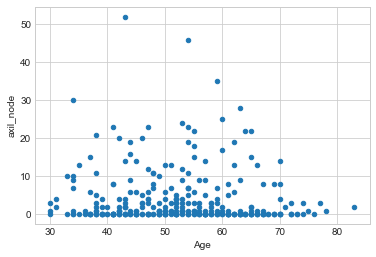

In [110]:
data.plot(kind='scatter',x='Age',y='axil_node')
plt.show()

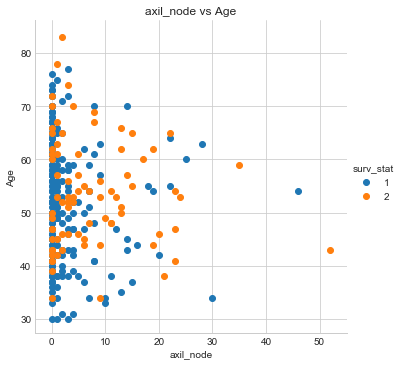

In [75]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="surv_stat",size=5)\
.map(plt.scatter,"axil_node","Age")\
.add_legend(); 
plt.title('axil_node vs Age')
plt.show();

In [116]:
#From above Box plot people who are having less number of axil_nodes are having high Survivalrate
#So axil node is one of the important feature`
#So the person with zero axil_node are having high Survival rate
#Year of operation is not having any importance in classification
#Most survival rate is between the age of 46-60

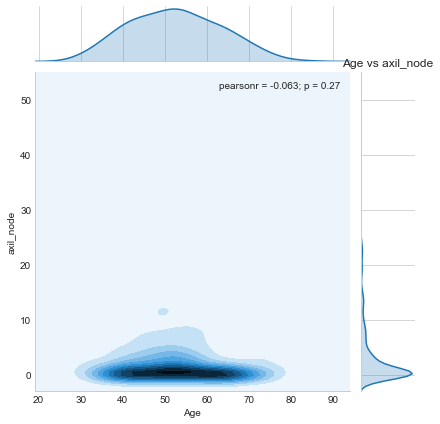

In [73]:
sns.jointplot(x="Age",y="axil_node",data=data,kind="kde")
plt.title('Age vs axil_node')
plt.show();

In [121]:
#maximum people who are having the less axil node are between the age of 45-65 

In [ ]:
# observations from bivariate analysis ##
# Axil node and op_year can help us to classify better
#Maximum people who are having the less axil nodes are between the age of45-65